In [1]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import requests
import pandas as pd
import os.path
import io

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

file_path = "all_month.csv"

if response.status_code == 200:
    content = response.content.decode('utf-8')
    new_data = pd.read_csv(io.StringIO(content))
    
    if os.path.exists(file_path):
        existing_data = pd.read_csv(file_path)
        merged_data = pd.concat([existing_data, new_data], ignore_index=True)
    else:
        merged_data = new_data

    merged_data.to_csv(file_path, index=False)
else:
    print("Error downloading file.")


In [3]:
df1 = pd.read_csv("all_month.csv")

df1 = df1.drop_duplicates()
output_file_path = "all_month.csv"
df1.to_csv(output_file_path, index=False)
dp = pd.read_csv("all_month.csv")
dp.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
13458,2023-04-02T19:48:35.051Z,-4.293700,143.608000,89.822,4.10,mb,14.0,184.0,3.395,0.91,...,2023-04-18T15:01:10.040Z,"56 km WSW of Angoram, Papua New Guinea",earthquake,14.34,10.807,0.165000,10.0,reviewed,us,us
13459,2023-04-02T17:30:06.586Z,58.173100,-155.368800,0.900,1.00,ml,NaN,NaN,NaN,0.59,...,2023-04-10T17:42:41.676Z,"86 km NW of Karluk, Alaska",earthquake,NaN,0.400,NaN,NaN,reviewed,ak,ak
13460,2023-04-02T17:28:27.260Z,51.853500,-178.087333,3.390,0.53,ml,4.0,211.0,NaN,0.15,...,2023-04-04T20:10:27.910Z,"100 km W of Adak, Alaska",earthquake,0.58,0.530,0.258824,4.0,reviewed,av,av
13461,2023-04-02T16:52:45.350Z,19.533333,-155.636000,8.110,3.01,ml,45.0,56.0,NaN,0.26,...,2023-04-30T20:08:54.040Z,"Island of Hawaii, Hawaii",earthquake,0.29,0.320,0.161500,22.0,reviewed,hv,hv
13462,2023-04-02T16:08:32.979Z,63.314000,-150.965900,12.400,1.40,ml,NaN,NaN,NaN,0.92,...,2023-04-07T03:20:41.827Z,"45 km SE of Denali National Park, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak


In [4]:
df=pd.read_csv('all_month.csv')

In [5]:
df = df.sort_values('time', ascending=True)

#Date extraction
df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
11952,2023-04-02T16:06:36.280Z,38.792167,-122.762167,2.50,0.51,md,18.0,74.0,0.020150,0.02,...,"2km NNW of The Geysers, CA",earthquake,0.20,0.37,0.327,12.0,reviewed,nc,nc,2023-04-02
13462,2023-04-02T16:08:32.979Z,63.314000,-150.965900,12.40,1.40,ml,NaN,NaN,NaN,0.92,...,"45 km SE of Denali National Park, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak,2023-04-02
11951,2023-04-02T16:08:32.979Z,63.314000,-150.965900,12.40,1.40,ml,NaN,NaN,NaN,0.92,...,Central Alaska,earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak,2023-04-02
11950,2023-04-02T16:09:07.150Z,38.827333,-122.851500,2.22,0.36,md,12.0,119.0,0.004202,0.01,...,"10km NW of The Geysers, CA",earthquake,0.74,0.42,0.283,11.0,reviewed,nc,nc,2023-04-02
11949,2023-04-02T16:11:55.290Z,37.601500,-122.457000,8.67,0.56,md,10.0,91.0,0.035080,0.04,...,"3km ESE of Pacifica, CA",earthquake,0.33,0.46,0.280,8.0,reviewed,nc,nc,2023-04-02


In [6]:

df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]
# df['date'] = df['time'].str.split(', ', expand=True) 
newdf = df['place'].str.split(', ', expand=True) 

In [7]:
df['place'] = newdf[1]
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

In [8]:

df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place', 'latitude', 'longitude']]

In [9]:
df = df[['date', 'depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df.head()

print('total locations:',len(set(df['place'])))

total locations: 104


In [10]:
eq_tmp = df.copy()


DAYS_OUT_TO_PREDICT = 7

eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    #avg. depth of 22 days rolling period and so on..
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean() 
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean() 
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)
    
    
    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

In [11]:

eq_all = pd.concat(eq_data)

In [12]:

eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [13]:

eq_data_last_days_out = pd.concat(eq_data_last_days_out)


eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [14]:

predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
9900,2023-04-29,11.50,1.50,California,39.315002,-119.959599,6.627273,6.180000,6.528571,0.668182,0.700000,1.000000,NaN
9901,2023-04-29,4.70,0.50,California,39.315002,-119.959599,6.554545,5.633333,6.542857,0.663636,0.713333,1.014286,NaN
9902,2023-04-30,5.80,1.50,California,39.315002,-119.959599,6.468182,5.866667,6.157143,0.727273,0.800000,1.114286,NaN
9903,2023-05-01,10.50,0.20,California,39.315002,-119.959599,6.563636,6.566667,6.771429,0.713636,0.773333,0.971429,NaN
9904,2023-05-01,0.00,1.20,California,39.315002,-119.959599,6.227273,5.846667,6.300000,0.736364,0.813333,0.971429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12033,2023-04-29,1.09,1.68,B.C.,32.482928,-115.579161,7.807273,6.949333,5.325714,1.794091,1.713333,1.592857,NaN
12034,2023-04-30,1.11,1.40,B.C.,32.482928,-115.579161,7.415000,5.964000,2.877143,1.771818,1.708000,1.522857,NaN
12035,2023-04-30,4.42,1.73,B.C.,32.482928,-115.579161,7.144091,6.274000,1.610000,1.770000,1.718667,1.507143,NaN
12036,2023-05-01,23.23,2.73,B.C.,32.482928,-115.579161,8.229545,7.038000,4.961429,1.822727,1.744000,1.737143,NaN


In [15]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    11022.000000
mean         0.037017
std          0.188812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: mag_outcome, dtype: float64


0    10614
1      408
Name: mag_outcome, dtype: int64

In [16]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Earthquakedata.db')
eq_all.to_sql('Earthquake_features', engine, index=False,if_exists='replace')

11022

In [17]:
engine = create_engine('sqlite:///Earthquakedata_predict.db')
predict_unknown.to_sql('Earthquake_predict', engine, index=False,if_exists='replace')


184

In [18]:
#Model implementation

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import xgboost as xgb
import sqlite3

In [20]:
import pandas as pd


conn = sqlite3.connect('Earthquakedata.db')


df_features = pd.read_sql_query("SELECT * FROM Earthquake_features", conn)

conn.close()


print(df_features)

             date   depth   mag       place   latitude   longitude  \
0      2023-04-11   0.000  0.10  California  39.315002 -119.959599   
1      2023-04-11  19.300  0.90  California  39.315002 -119.959599   
2      2023-04-11   9.200  1.90  California  39.315002 -119.959599   
3      2023-04-11   9.300  1.00  California  39.315002 -119.959599   
4      2023-04-12  14.800  1.00  California  39.315002 -119.959599   
...           ...     ...   ...         ...        ...         ...   
11017  2023-05-01   8.405  5.10       Japan  32.051047  134.481206   
11018  2023-05-01   6.761  5.30       Japan  32.051047  134.481206   
11019  2023-05-01  10.813  5.90       Japan  32.051047  134.481206   
11020  2023-04-27  -0.230  1.12        B.C.  32.482928 -115.579161   
11021  2023-04-28   1.090  1.42        B.C.  32.482928 -115.579161   

       depth_avg_22  depth_avg_15  depth_avg_7  mag_avg_22  mag_avg_15  \
0          5.977273      7.720000     6.385714    0.909091    0.646667   
1          

In [21]:

conn = sqlite3.connect('Earthquakedata_predict.db')

df_predict = pd.read_sql_query("SELECT * FROM Earthquake_predict", conn)

conn.close()


print(df_predict)


           date  depth   mag       place   latitude   longitude  depth_avg_22  \
0    2023-04-29  11.50  1.50  California  39.315002 -119.959599      6.627273   
1    2023-04-29   4.70  0.50  California  39.315002 -119.959599      6.554545   
2    2023-04-30   5.80  1.50  California  39.315002 -119.959599      6.468182   
3    2023-05-01  10.50  0.20  California  39.315002 -119.959599      6.563636   
4    2023-05-01   0.00  1.20  California  39.315002 -119.959599      6.227273   
..          ...    ...   ...         ...        ...         ...           ...   
179  2023-04-29   1.09  1.68        B.C.  32.482928 -115.579161      7.807273   
180  2023-04-30   1.11  1.40        B.C.  32.482928 -115.579161      7.415000   
181  2023-04-30   4.42  1.73        B.C.  32.482928 -115.579161      7.144091   
182  2023-05-01  23.23  2.73        B.C.  32.482928 -115.579161      8.229545   
183  2023-05-01   9.04  1.37        B.C.  32.482928 -115.579161      7.978182   

     depth_avg_15  depth_av

In [22]:

features = [f for f in list(df_features) if f not in ['date', 'lon_box_mean',
 'lat_box_mean', 'mag_outcome', 'mag', 'place',
 'combo_box_mean',  'latitude',
 'longitude']]


X_train, X_test, y_train, y_test = train_test_split(df_features[features],
                     df_features['mag_outcome'], test_size=0.3, random_state=42)
  

In [23]:
features

['depth',
 'depth_avg_22',
 'depth_avg_15',
 'depth_avg_7',
 'mag_avg_22',
 'mag_avg_15',
 'mag_avg_7']

[21:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

0.9837437562719165
AUC: 0.9837


C:\Users\balin\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


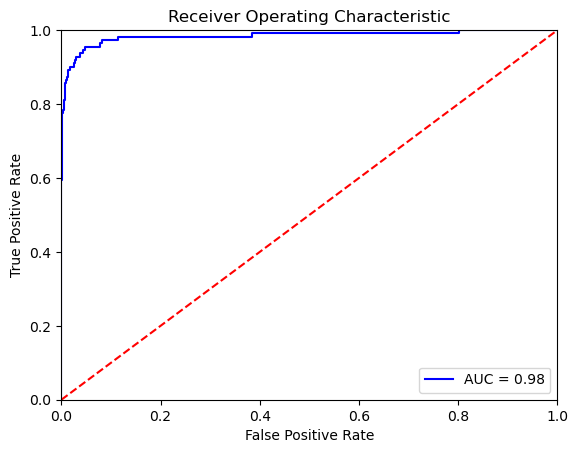

Confusion Matrix: 
 [[3177   19]
 [  22   89]]

Recall 'TP/TP+FN' =  0.8018018018018018


In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

dtrain = xgb.DMatrix(X_train[features], label=y_train)
dtest = xgb.DMatrix(X_test[features], label=y_test)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

param = {
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'max_depth': 6,  
        'eta': 0.003,  
        'silent': 1} 
num_round = 5000    
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

print (roc_auc_score(y_test, preds))
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

ypred_bst = np.array(bst.predict(dtest,ntree_limit=bst.best_iteration))
ypred_bst  = ypred_bst > 0.5
ypred_bst = ypred_bst.astype(int)  

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Confusion Matrix: \n",confusion_matrix(y_test,ypred_bst))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,ypred_bst))


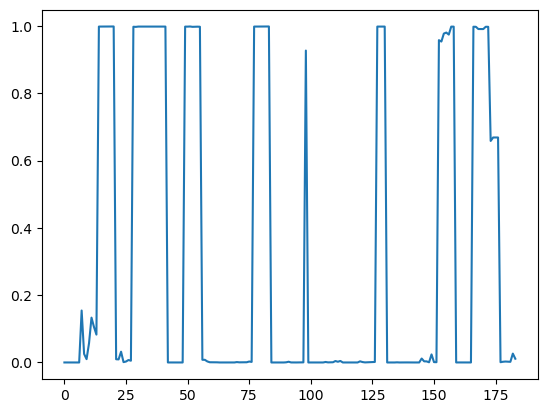

In [26]:
dlive = xgb.DMatrix(df_predict[features]) #, label=[])
preds = bst.predict(dlive)

plt.plot(preds)
plt.show()

In [27]:
live_set = df_predict[['date', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds

live_set = live_set.groupby(['date', 'place'], as_index=False).mean()


live_set['date']= pd.to_datetime(live_set['date'],format='%Y-%m-%d') 
live_set['date'] = live_set['date'] + pd.to_timedelta(7,unit='d')

live_set.tail()

C:\Users\balin\AppData\Local\Temp\ipykernel_9128\2821658332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_set.loc[:,'quake'] = preds


,date,place,latitude,longitude,quake
73,2023-05-09,Puerto Rico,18.075749,-66.869498,0.990146
74,2023-05-09,Russia,53.007946,104.259646,0.998184
75,2023-05-09,Tennessee,36.196080,-88.998759,0.002270
76,2023-05-09,Utah,38.824316,-112.619041,0.000080
77,2023-05-09,Washington,47.061346,-121.788118,0.000084


In [28]:
import datetime as dt

days = list(set([d for d in live_set['date'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))

days.sort()

predict_day=days[2]
predict_day

'2023-05-05'

In [29]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


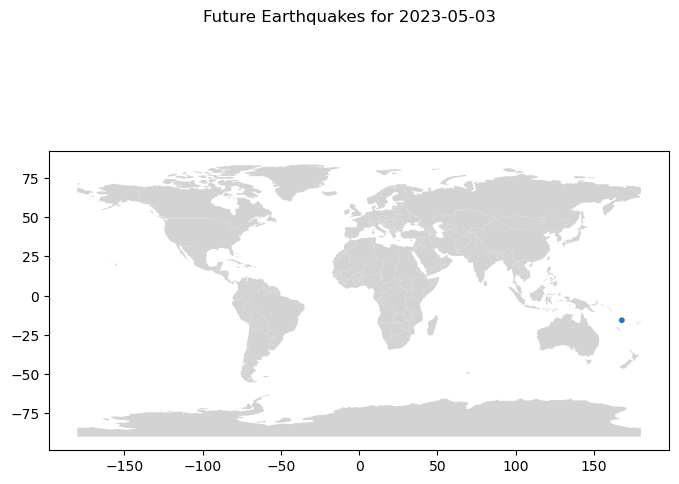

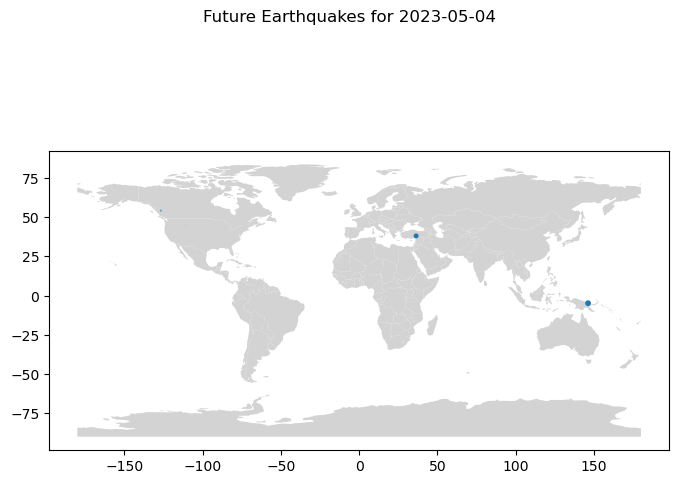

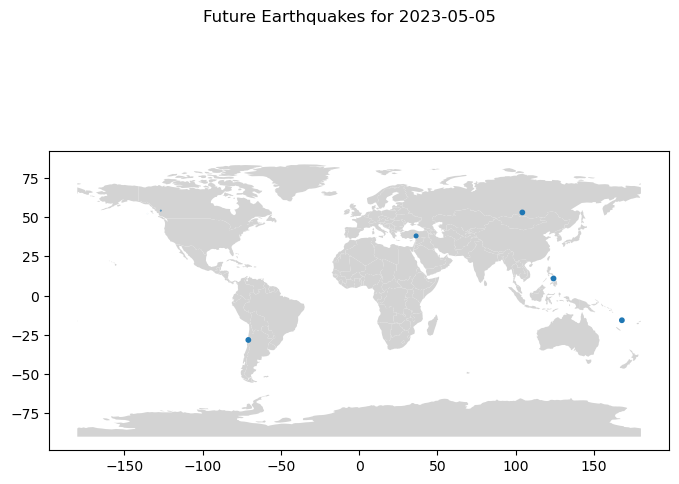

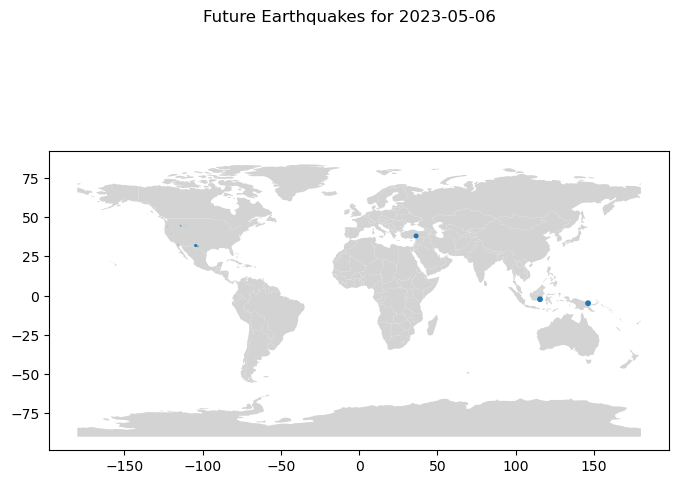

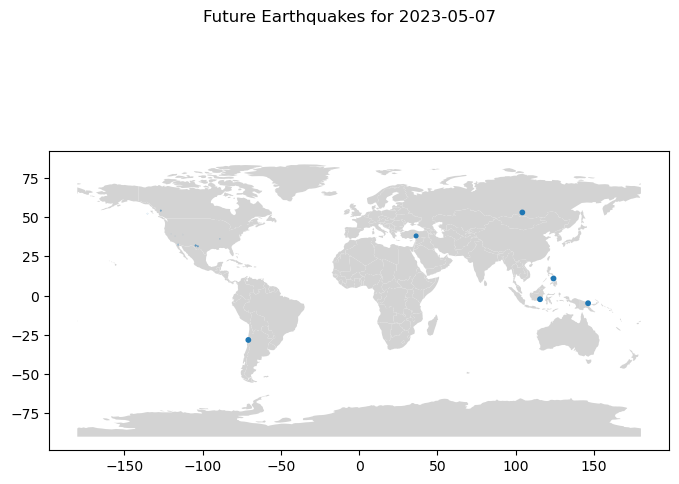

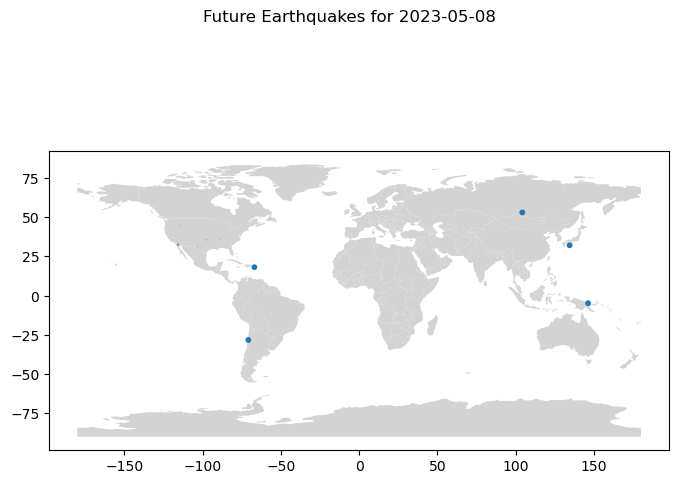

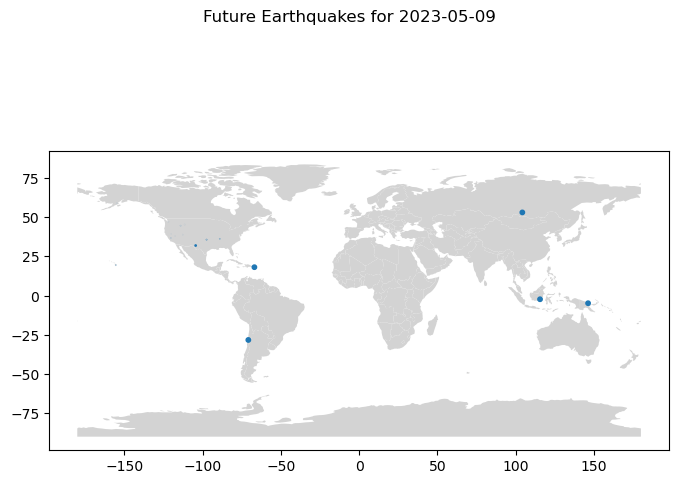

In [30]:
import geopandas as gpd
for i in range(len(days)):
    fig, ax = plt.subplots(figsize=(8,6))
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="lightgrey",ax=ax)
    live_set_tmp = live_set[live_set['date'] == days[i]]
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 10))
 
    plt.show()